# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

Drew Barnhart

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

#installed citipy
! pip install citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 637


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
for i, city in enumerate(cities[:3]):

    print(i,city)
    
# i = index, city = name/value 

0 rikitea
1 mataura
2 atuona


In [4]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# ^^^ f will take value within curly bracket(variable) and put it within the string

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"&q="+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities VV#when using try its when a code might have an error
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

print(city_data)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | andenes
Processing Record 5 of Set 1 | luba
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | dingle
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | nuuk
Processing Record 10 of Set 1 | tasiilaq
Processing Record 11 of Set 1 | los llanos de aridane
Processing Record 12 of Set 1 | constitucion
Processing Record 13 of Set 1 | ondorhaan
City not found. Skipping...
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | severo-kurilsk
Processing Record 16 of Set 1 | canutama
Processing Record 17 of Set 1 | nur
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | derzhavinsk
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | qaanaaq
Processing

Processing Record 34 of Set 4 | butaritari
Processing Record 35 of Set 4 | umm kaddadah
Processing Record 36 of Set 4 | sabirabad
Processing Record 37 of Set 4 | harper
Processing Record 38 of Set 4 | kota bahru
Processing Record 39 of Set 4 | petatlan
Processing Record 40 of Set 4 | maykain
City not found. Skipping...
Processing Record 41 of Set 4 | saldanha
Processing Record 42 of Set 4 | lolua
City not found. Skipping...
Processing Record 43 of Set 4 | hamilton
Processing Record 44 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 45 of Set 4 | cockburn town
Processing Record 46 of Set 4 | tiksi
Processing Record 47 of Set 4 | grand gaube
Processing Record 48 of Set 4 | northam
Processing Record 49 of Set 4 | diffa
Processing Record 0 of Set 5 | biltine
Processing Record 1 of Set 5 | inhambane
Processing Record 2 of Set 5 | fort nelson
Processing Record 3 of Set 5 | antalaha
Processing Record 4 of Set 5 | arlit
Processing Record 5 of Set 5 | keetmanshoop
Processi

City not found. Skipping...
Processing Record 23 of Set 8 | ahuimanu
Processing Record 24 of Set 8 | tessalit
Processing Record 25 of Set 8 | mocambique
City not found. Skipping...
Processing Record 26 of Set 8 | rosarito
Processing Record 27 of Set 8 | atka
City not found. Skipping...
Processing Record 28 of Set 8 | ishinomaki
Processing Record 29 of Set 8 | telc
Processing Record 30 of Set 8 | lompoc
Processing Record 31 of Set 8 | kysyl-syr
Processing Record 32 of Set 8 | shache
Processing Record 33 of Set 8 | awjilah
Processing Record 34 of Set 8 | bac lieu
Processing Record 35 of Set 8 | ipira
Processing Record 36 of Set 8 | jumla
Processing Record 37 of Set 8 | karasjok
Processing Record 38 of Set 8 | pisco
Processing Record 39 of Set 8 | auki
Processing Record 40 of Set 8 | ust-tsilma
Processing Record 41 of Set 8 | poopo
Processing Record 42 of Set 8 | dongsheng
Processing Record 43 of Set 8 | suntar
Processing Record 44 of Set 8 | adeje
Processing Record 45 of Set 8 | wellingt

Processing Record 14 of Set 12 | riberalta
Processing Record 15 of Set 12 | dudinka
Processing Record 16 of Set 12 | matay
Processing Record 17 of Set 12 | maneadero
Processing Record 18 of Set 12 | grand forks
Processing Record 19 of Set 12 | bokspits
City not found. Skipping...
Processing Record 20 of Set 12 | banjar
Processing Record 21 of Set 12 | charlottetown
Processing Record 22 of Set 12 | verkhnyaya inta
Processing Record 23 of Set 12 | kloulklubed
Processing Record 24 of Set 12 | nirmal
Processing Record 25 of Set 12 | kamalia
Processing Record 26 of Set 12 | pahrump
Processing Record 27 of Set 12 | sechura
Processing Record 28 of Set 12 | vienenburg
Processing Record 29 of Set 12 | kahului
Processing Record 30 of Set 12 | bacungan
Processing Record 31 of Set 12 | kumluca
Processing Record 32 of Set 12 | chunhuhub
Processing Record 33 of Set 12 | bandar-e lengeh
Processing Record 34 of Set 12 | palmas de monte alto
Processing Record 35 of Set 12 | parsabad
Processing Record 3

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,25.91,75,9,7.14,PF,1675620588
1,mataura,-46.1927,168.8643,14.37,90,99,4.49,NZ,1675620579
2,atuona,-9.8000,-139.0333,25.72,78,11,7.54,PF,1675620589
3,andenes,69.3143,16.1194,3.99,48,0,11.83,NO,1675620590
4,luba,3.4568,8.5547,27.61,81,44,4.48,GQ,1675620591


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,25.91,75,9,7.14,PF,1675620588
1,mataura,-46.1927,168.8643,14.37,90,99,4.49,NZ,1675620579
2,atuona,-9.8000,-139.0333,25.72,78,11,7.54,PF,1675620589
3,andenes,69.3143,16.1194,3.99,48,0,11.83,NO,1675620590
4,luba,3.4568,8.5547,27.61,81,44,4.48,GQ,1675620591


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

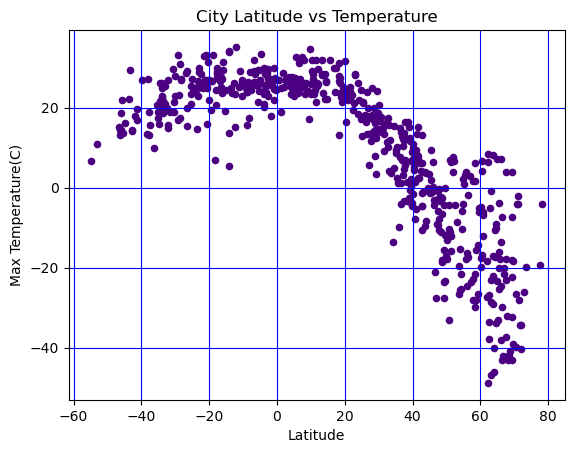

In [9]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter( "Lat", "Max Temp", c="indigo")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title("City Latitude vs Temperature")
plt.grid(True, c="blue")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

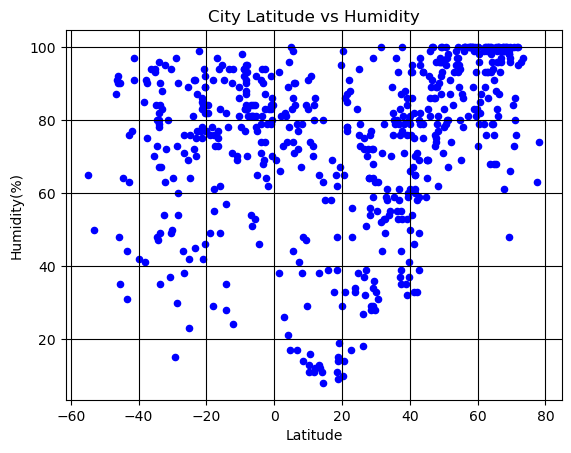

In [10]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter( "Lat", "Humidity", c="blue")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs Humidity")
plt.grid(True, c="black")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

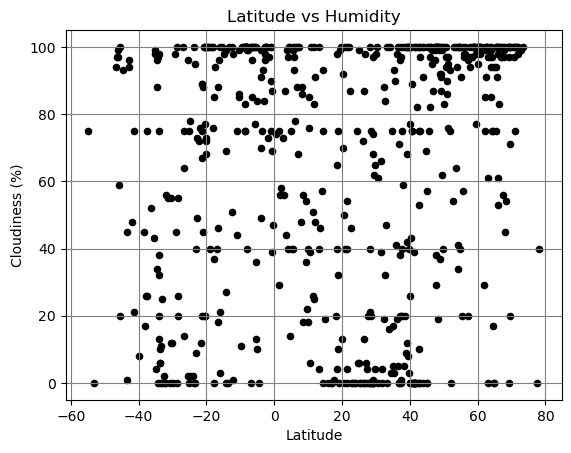

In [11]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter( "Lat", "Cloudiness", c="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs Humidity")
plt.grid(True, c="grey")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

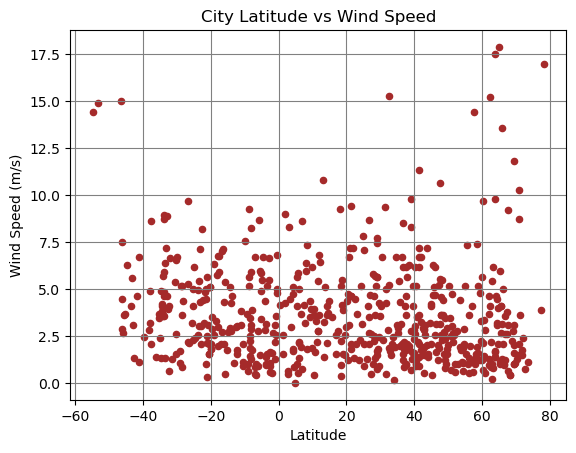

In [12]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter( "Lat", "Wind Speed", c="brown")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed")
plt.grid(True, c="grey")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# Define a function to create Linear Regression plots

northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,andenes,69.3143,16.1194,3.99,48,0,11.83,NO,1675620590
4,luba,3.4568,8.5547,27.61,81,44,4.48,GQ,1675620591
6,dingle,10.9995,122.6711,23.33,92,100,3.28,PH,1675620330
8,nuuk,64.1835,-51.7216,-10.66,79,75,4.63,GL,1675620593
9,tasiilaq,65.6145,-37.6368,-3.91,83,100,4.07,GL,1675620593


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,25.91,75,9,7.14,PF,1675620588
1,mataura,-46.1927,168.8643,14.37,90,99,4.49,NZ,1675620579
2,atuona,-9.8000,-139.0333,25.72,78,11,7.54,PF,1675620589
5,bluff,-46.6000,168.3333,15.22,87,94,15.03,NZ,1675620143
7,busselton,-33.6500,115.3333,18.81,84,6,6.40,AU,1675620142


###  Temperature vs. Latitude Linear Regression Plot

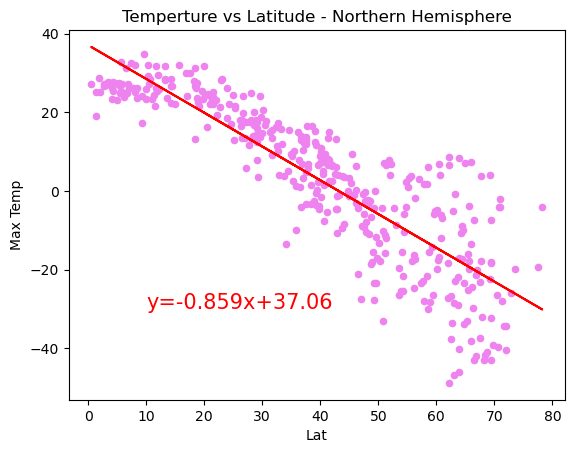

In [15]:
# Linear regression on Northern Hemisphere

(slope,intercept,rvalue,pvalue,stderr)=linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

#regression values

regression= northern_hemi_df["Lat"]*slope+intercept

northern_hemi_df.plot.scatter("Lat","Max Temp", c= "violet")

plt.plot(northern_hemi_df["Lat"],regression, c="red")


#show formula & figure out positioning on graph

plt.annotate(f"y={round(slope,3)}x+{round(intercept,3)}",(10,-30),c="red",fontsize=15)

#add title

plt.title("Temperture vs Latitude - Northern Hemisphere")


plt.show()

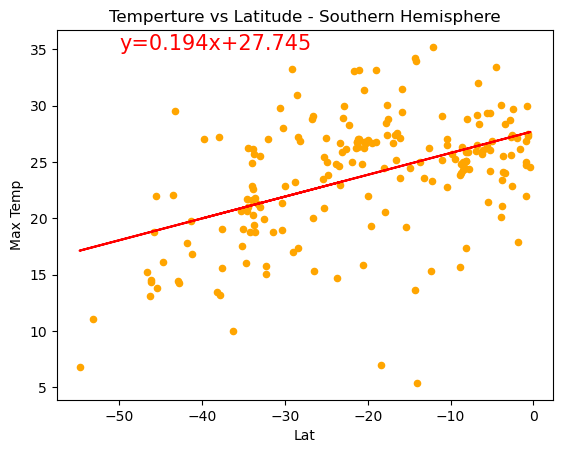

In [16]:
# Linear regression on Southern Hemisphere

(slope,intercept,rvalue,pvalue,stderr)=linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

#regression values

regressionsouth= southern_hemi_df["Lat"]*slope+intercept

southern_hemi_df.plot.scatter("Lat","Max Temp", c= "orange")

plt.plot(southern_hemi_df["Lat"],regressionsouth, c="red")


#show formula & figure out positioning on graph
plt.annotate(f"y={round(slope,3)}x+{round(intercept,3)}",(-50,35),c="red",fontsize=15)

#add title
plt.title("Temperture vs Latitude - Southern Hemisphere")


plt.show()


**Discussion about the linear relationship:** While comparing temperature and latitude, both the Northern and Southern Hemispheres' appear to have a relatively strong linear correlation/rlationship. In th eNorthen Hemipshere, as latitude increases temperature generally decreases. The inverse is true for the Southern Hemisphere. This phenomena makes sense, the equator (lat 0) recieves the most direct sunlight along the earths axis, enabling more solar radiation. As cities geographic positioning is located further away from the equator, less solar radiation is present...resulting in lower temperatures as you approach the N/S poles. 

### Humidity vs. Latitude Linear Regression Plot

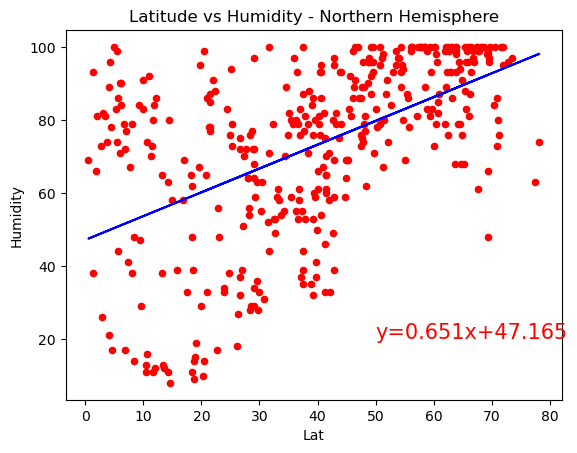

In [17]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere

(slope,intercept,rvalue,pvalue,stderr)=linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

#regression values

regression= northern_hemi_df["Lat"]*slope+intercept

northern_hemi_df.plot.scatter("Lat","Humidity", c= "red")

plt.plot(northern_hemi_df["Lat"],regression, c="blue")


#show formula & figure out positioning on graph

plt.annotate(f"y={round(slope,3)}x+{round(intercept,3)}",(50,20),c="red",fontsize=15)

#add title

plt.title("Latitude vs Humidity - Northern Hemisphere")


plt.show()

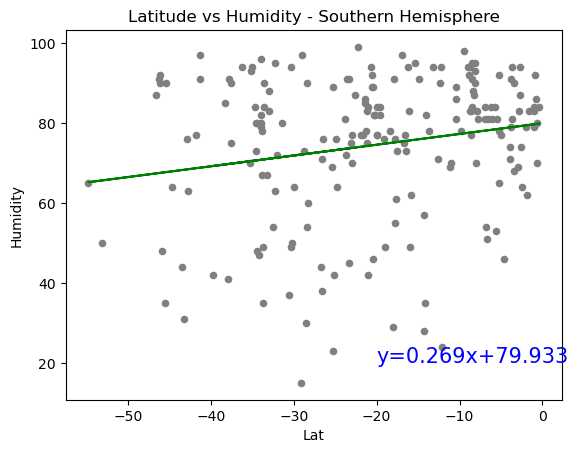

In [18]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere

(slope,intercept,rvalue,pvalue,stderr)=linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

#regression values

regressionsouth= southern_hemi_df["Lat"]*slope+intercept

southern_hemi_df.plot.scatter("Lat","Humidity", c= "grey")

plt.plot(southern_hemi_df["Lat"],regressionsouth, c="green")


#show formula & figure out positioning on graph
plt.annotate(f"y={round(slope,3)}x+{round(intercept,3)}",(-20,20),c="blue",fontsize=15)

#add title
plt.title("Latitude vs Humidity - Southern Hemisphere")


plt.show()

**Discussion about the linear relationship:** Due to the spread of the city-data points a weak relationship seems present regarding latitude and humidity. However, the northern hemisphere seems to have a tighter spread and stronger correlation. Thi smakes sense because humidiy is determined by air temperature, location of nearest war body of water, and air movement. Temperture as shown in the last plots is related to longitude (possibly explaining why a weak relationship is present). But, cities proximity to water and air movement are not related to latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

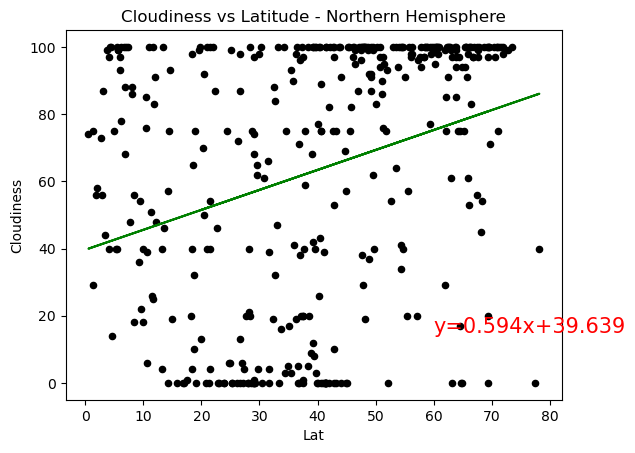

In [19]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere

(slope,intercept,rvalue,pvalue,stderr)=linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

#regression values

regression= northern_hemi_df["Lat"]*slope+intercept

northern_hemi_df.plot.scatter("Lat","Cloudiness", c= "black")

plt.plot(northern_hemi_df["Lat"],regression, c="green")


#show formula & figure out positioning on graph

plt.annotate(f"y={round(slope,3)}x+{round(intercept,3)}",(60,15),c="red",fontsize=15)

#add title

plt.title("Cloudiness vs Latitude - Northern Hemisphere")


plt.show()

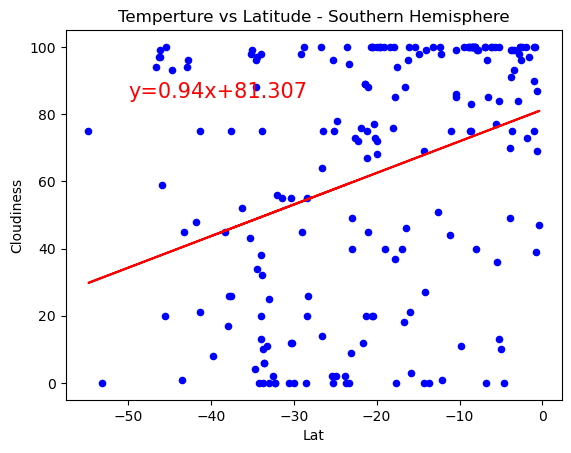

In [20]:
# Southern Hemisphere

# Linear regression on Southern Hemisphere

(slope,intercept,rvalue,pvalue,stderr)=linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

#regression values

regressionsouth= southern_hemi_df["Lat"]*slope+intercept

southern_hemi_df.plot.scatter("Lat","Cloudiness", c= "blue")

plt.plot(southern_hemi_df["Lat"],regressionsouth, c="red")


#show formula & figure out positioning on graph
plt.annotate(f"y={round(slope,3)}x+{round(intercept,3)}",(-50,85),c="red",fontsize=15)

#add title
plt.title("Temperture vs Latitude - Southern Hemisphere")


plt.show()

**Discussion about the linear relationship:** Similar to the previous graphs relating to humidity, a wide spread of cities/points is displayed in either the Northern or Southern HEmispheres with very minimal correlation. The spread does not seem to indicate a relationship between cloudiness and latitude. This is too be expected due to the fact that cloudiness within an area is contributed to a muktitude of factors. Including: Rainfall, Sea Surface Temp, Air Temperature, and Iradiance. 

### Wind Speed vs. Latitude Linear Regression Plot

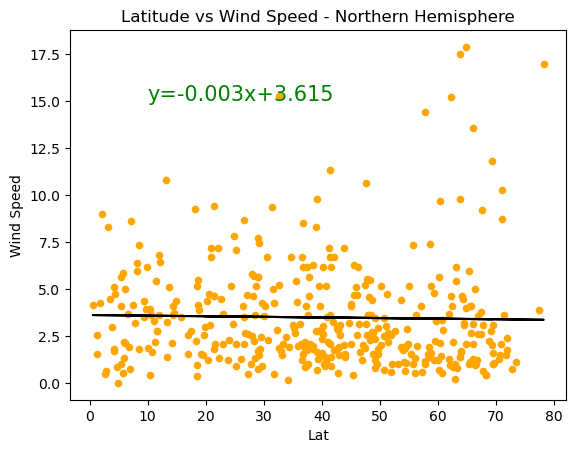

In [21]:
# Northern Hemisphere

# Linear regression on Northern Hemisphere

(slope,intercept,rvalue,pvalue,stderr)=linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

#regression values

regression= northern_hemi_df["Lat"]*slope+intercept

northern_hemi_df.plot.scatter("Lat","Wind Speed", c= "orange")

plt.plot(northern_hemi_df["Lat"],regression, c="black")


#show formula & figure out positioning on graph

plt.annotate(f"y={round(slope,3)}x+{round(intercept,3)}",(10,15),c="green",fontsize=15)

#add title

plt.title("Latitude vs Wind Speed - Northern Hemisphere")


plt.show()

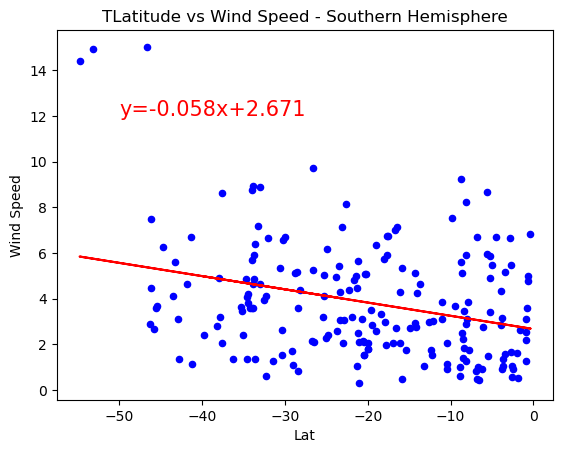

In [22]:
# Southern Hemisphere


# Linear regression on Southern Hemisphere

(slope,intercept,rvalue,pvalue,stderr)=linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

#regression values

regressionsouth= southern_hemi_df["Lat"]*slope+intercept

southern_hemi_df.plot.scatter("Lat","Wind Speed", c= "blue")

plt.plot(southern_hemi_df["Lat"],regressionsouth, c="red")


#show formula & figure out positioning on graph
plt.annotate(f"y={round(slope,3)}x+{round(intercept,3)}",(-50,12),c="red",fontsize=15)

#add title
plt.title("TLatitude vs Wind Speed - Southern Hemisphere")


plt.show()



**Discussion about the linear relationship:** According to the graphs, Their appears to be a weak relationship between latitude and and wind speed. In both the Northern and Southern Hemisphere winds seem to have a wide degreee of variability with little relation to latitude. This is too be expected due to the fact that winds speeds are highly dependent on in situ geographic positioning. IE: location nearest mountaains, oceans, and other geologic features. Additionally wind speeds is dependent also on weather conditions. 